<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_ARIMA_WebScrapping_Feminicidio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prever Feminicidios | dados do Governo de SP | serie temporal ARIMA - ML

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 9.8 MB 34.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import plotly.graph_objects as Dash
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
site = 'http://www.ssp.sp.gov.br/Estatistica/ViolenciaMulher.aspx'

In [4]:
pagina = requests.get(site)

In [5]:
coleta = BeautifulSoup(pagina.text, 'html.parser')

In [6]:
print(coleta.title)

<title>
	SSP
</title>


In [7]:
tabelas = coleta.find_all('table', attrs={'class':'table table-striped table-hover table-condensed'})

In [8]:
print('Localizado:', len(tabelas),'tabelas')

Localizado: 121 tabelas


tratamentos dos dados

In [9]:
Rotulos = []
Dados = []
Periodos = []

Registro_Inicial = datetime.datetime(2021, 11, 22)

Loop = 0

for Consulta in tabelas:
  Linha = Consulta.find_all('tr')[2]
  Rotulo = Linha.find_all('td')[0].text
  Informação = Linha.find_all('span')[0].text
  Data = Registro_Inicial - relativedelta(months=Loop)

  #caso tenha feminicidio

  if Rotulo == 'FEMINICÍDIO':
    Rotulos.append(Rotulo)
    Dados.append(Informação)
    Periodos.append(Data)
  else:
   pass

    #somando o loop para dar o mes
  Loop = Loop + 1

#organização dos dados em um dicionario
Dicionario = {
    'Rotulo': Rotulos, 
    'Quantidade': Dados,
     'Periodo': Periodos
}
 
 #passando o dicionario como base de dados

Base_Feminicidio = pd.DataFrame(Dicionario)

In [10]:
Base_Feminicidio.head()

,Rotulo,Quantidade,Periodo
0,FEMINICÍDIO,6,2021-11-22
1,FEMINICÍDIO,8,2021-10-22
2,FEMINICÍDIO,8,2021-09-22
3,FEMINICÍDIO,7,2021-08-22
4,FEMINICÍDIO,26,2021-07-22


In [11]:
Base_Feminicidio.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Rotulo,Quantidade,Periodo
count,45,45,45
unique,1,19,45
top,FEMINICÍDIO,8,2019-11-22 00:00:00
freq,45,6,1
first,NaN,NaN,2018-03-22 00:00:00
last,NaN,NaN,2021-11-22 00:00:00


In [12]:
#preparando os dados para a serie
Base_Feminicidio = Base_Feminicidio.set_index('Periodo')
#ordenar a data
Base_Feminicidio = Base_Feminicidio.sort_values(by='Periodo')

In [13]:
Base_Feminicidio

,Rotulo,Quantidade
Periodo,,
2018-03-22,FEMINICÍDIO,5
2018-04-22,FEMINICÍDIO,8
2018-05-22,FEMINICÍDIO,8
2018-06-22,FEMINICÍDIO,14
2018-07-22,FEMINICÍDIO,16
2018-08-22,FEMINICÍDIO,6
2018-09-22,FEMINICÍDIO,16
2018-10-22,FEMINICÍDIO,11
2018-11-22,FEMINICÍDIO,11


In [14]:
#verificando os tipos de colunas
Base_Feminicidio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2018-03-22 to 2021-11-22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rotulo      45 non-null     object
 1   Quantidade  45 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [15]:
#convertendo a coluna para inteiro
Base_Feminicidio['Quantidade'] = pd.to_numeric(Base_Feminicidio['Quantidade'])

In [16]:
#plotar o historico agora
figura = Dash.Figure()
figura.add_trace(Dash.Scatter(x = Base_Feminicidio.index, y = Base_Feminicidio.Quantidade,
                   mode='lines',
                   name='Quantidade',
                   marker_color= 'red',))

figura.update_layout(
    title='Historico de Feminicidio SP',
    titlefont_size=28,

    xaxis= dict(
        title ='Periodo Historico',
        titlefont_size=16,
        tickfont_size=14),


    height = 500,
    
  
    yaxis = dict(
        title='Quantidade',
        titlefont_size=16,
        tickfont_size=14),

    legend = dict(
        y =1, x = 1, 
        bgcolor ='red',
        bordercolor ='red'))


figura.show()
       



In [32]:
#Treinar o Modelo
from pmdarima.arima import auto_arima
Funcao_auto_arima = auto_arima(
    Base_Feminicidio['Quantidade'],
    start_p=1, start_q=1,
    max_p=6, max_q=6,
    m=12, #diferenciação sazonal,
    start_P=0,
    seasonal=True,
    d=1,
    D=1,
    trace=True,
    error_action='ignore',
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=240.077, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=221.618, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=229.858, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=221.277, Time=0.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=223.276, Time=0.39 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=232.942, Time=0.20 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=219.044, Time=0.49 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=219.458, Time=0.16 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=221.034, Time=1.76 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=220.804, Time=0.51 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=221.07

In [34]:
#testes

print(Funcao_auto_arima.aic()) #melhor performance do modelo

217.6819164275532


In [35]:
#definindo o tamanho da base de dados para o treino
Tamanho = int(len(Base_Feminicidio)*0.75)

In [36]:
#separando teste e treino
Dados_treino, Dados_teste = Base_Feminicidio['Quantidade'][0:Tamanho], Base_Feminicidio['Quantidade'][Tamanho:]

In [37]:
#treinando com os dados de treino
Funcao_auto_arima.fit(Dados_treino)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)

In [38]:
#fazendo previsão

Previsao = Funcao_auto_arima.predict(n_periods=len(Dados_teste))

In [39]:
#agora inckuindo em um dataframe

Base_Previsao = pd.DataFrame( Previsao, index=Dados_teste.index, columns=['Previsao'])

In [40]:
#unindo o real vc a previsao

Juntando_bases = pd.concat([Dados_teste, Base_Previsao], axis=1)

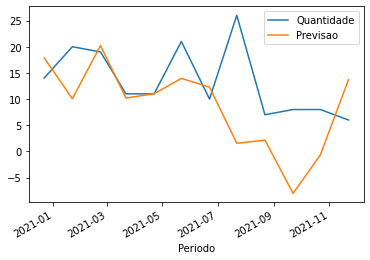

In [42]:
#plotando

Juntando_bases.plot();

In [43]:
#mais uma vez agora

Juntando_bases_2 = pd.concat([Base_Feminicidio['Quantidade'], Base_Previsao], axis=1)

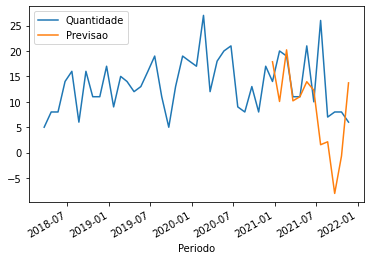

In [45]:
Juntando_bases_2.plot();

In [46]:
#erro medio
from sklearn.metrics import mean_squared_error

mean_squared_error(Dados_teste, Previsao)

98.58627105176275

In [48]:
#prever o proximo semestre

Funcao_auto_arima.fit(Base_Feminicidio['Quantidade'])

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)

In [49]:
Previsao_meses_futuros = Funcao_auto_arima.predict(n_periods=6)

In [50]:
Previsao_meses_futuros

array([10.07535619,  2.45110991,  8.55584443,  1.58172729,  0.96719217,
        0.66834097])

In [51]:
#listas para receber os dados futuros

Listas_Datas_Futuras = []

#loop para gerar as datas

for Loop in range(7,13):
  Proxima_Data = Registro_Inicial + relativedelta(month=Loop)
  #salvdno nas listas
  Listas_Datas_Futuras.append(Proxima_Data)

In [52]:
#colocando em uma dataframe
Base_Futura = pd.DataFrame(Previsao_meses_futuros, index=Listas_Datas_Futuras, columns=['Futuro'])

In [53]:
Base_Futura

,Futuro
2021-07-22,10.075356
2021-08-22,2.451110
2021-09-22,8.555844
2021-10-22,1.581727
2021-11-22,0.967192
2021-12-22,0.668341


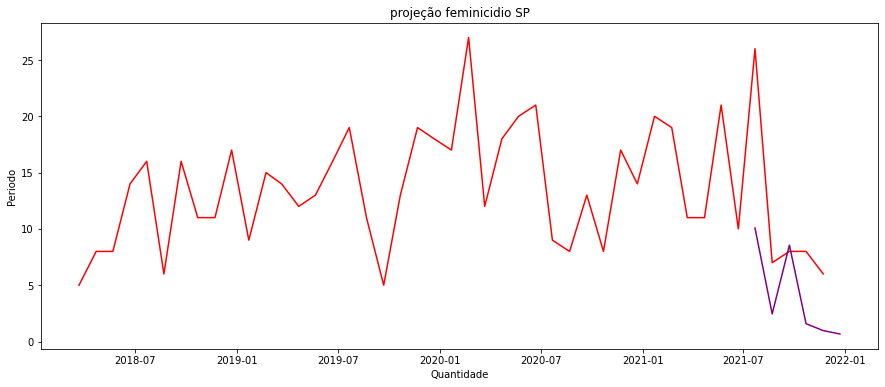

In [55]:
#grafico: historico vs realizado

plt.figure(figsize=(15,6))
plt.title('projeção feminicidio SP')
plt.xlabel('Quantidade')
plt.ylabel('Periodo')
plt.plot(Base_Feminicidio['Quantidade'],color='red')
plt.plot(Base_Futura, color='purple');

Pronto, feito, conseguimos ver os feminicidios atuais e prever os proximos  com os dados do Governo do Estado de SP através da serie temporal ARIMA